# Analysis and Visualization of NBA Shot Logs Data

### Introduction
“Analytics are part and parcel of virtually everything we do now,” NBA commissioner Adam Silver said at an analytics conference held by Wharton School of Business in 2017. 
Since 2009, a video system has been used to track the movement of every NBA player on the court and the ball, 25 times a second by the league.

With the improvement of technology and the explosion of the new data, the league’s analytics movement has been pushed forward significantly, where data scientists began to be able to use cartography and machine learning to better assess players and even help their team win. Not only that, the NBA’s data revolution has impacted every aspects of the league, such as how much salary the player should be worth per year, how many games the player should be rested, and so on.

As data science and the basketball games become more intertwined, more insights and works could be extracted and done by dealing with different kind of basketball data. Therefore, we will be trying to analyze and visualize NBA shot logs data in this tutorial. Specifically, this tutorial is composed of three parts.

1. **Players’ performance on the offensive and defensive end** 
2. **Players’ field goal percentage in terms of shot distance and shot clock time**
3. **The exploration of hot hand phenomenon**

### Data Scource: NBA Shot Logs Data
Unfortunately, the NBA stopped providing its API publicly a few years ago. Therefore, we will be working with [NBA shot logs data](https://www.kaggle.com/dansbecker/nba-shot-logs) from the 2014–2015 season that was acquired while the public API was still available. We have already prepared the data for the purposes of this tutorial.

We will be mainly using [`pandas`](https://pandas.pydata.org/pandas-docs/stable/user_guide/) and [`matplotlib`](https://matplotlib.org) to work with this data.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Part One: Players’ performance on the offensive and defensive end
In the beginning, we will simply evaluate NBA players’ performance on the offensive and defensive end in the 2014–2015 season by using players’ field goal percentage and defensive success percentage. In detail, **field goal percentage** (including two-point and three-point field goal) is the ratio of field goals made to field goals attempted, while **defensive success percentage** is the ratio of the number of successful defenses to the number of defenses. We will begin by doing the following steps.

1. Loading the data to create Pandas Dataframe by using the [`read_csv`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html), and mapping (`made`, `missed`) to (1,0) in the `SHOT_RESULT` column  
2. Grouping the data by `player_id` and `CLOSEST_DEFENDER_PLAYER_ID` respectively by using the [`groupby`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html)
3. Calculating players’ field goal percentage (FGP) and defensive success percentage (DSP)
4. Assigning players’ names to their FGP and DSP by using the [`merge`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.merge.html)
5. Creating a scatter plot of DSP vs FGP with adjusted marker size, marker color,and the limits of the axes by using [`matplotlib.pyplot.scatter`](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.scatter.htmll)

In [2]:
data = pd.read_csv("data/shot_logs.csv",header=0)
data['SHOT_RESULT'] = data['SHOT_RESULT'].map({'made': 1, 'missed': 0})

In [3]:
FGM = data.groupby(['player_id']).sum().SHOT_RESULT 
FGA = data.groupby(['player_id']).count().SHOT_RESULT
FGP = FGM.div(FGA)
DF = data.groupby(['CLOSEST_DEFENDER_PLAYER_ID']).sum().SHOT_RESULT
DN = data.groupby(['CLOSEST_DEFENDER_PLAYER_ID']).count().SHOT_RESULT
DSP = (DN-DF).div(DN)

In [4]:
result = pd.concat([FGP, DSP], axis=1).dropna()
result.columns = ['FGP', 'DSP']
result['ID'] = result.index

In [5]:
M = data[['player_name','player_id']]
M.columns = ['NAME', 'ID']
result2 = pd.merge(result,M,on='ID')
final_result = result2.groupby(['NAME']).mean()

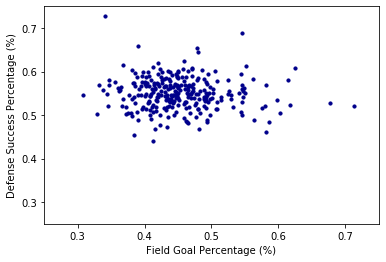

In [6]:
plt.scatter(final_result.FGP, final_result.DSP, c='DarkBlue', s=10)
plt.xlim([0.25,0.75])
plt.ylim([0.25,0.75])
plt.xlabel('Field Goal Percentage (%)')
plt.ylabel('Defense Success Percentage (%)')
plt.show()

Intuitively, as shown in the above scatter plot of DSP vs FGP, the points on the top right corner represents the players who have the more effective performance on both offensive and defensive end, while the points on the bottom left corner represents the players who have the less effective performance on both offensive and defensive end. 

However, this scatter plot is not able to indicate the players’ performance on the offensive and defensive precisely. Therefore, we will make DSP minus the median of DSP, and FGP minus the median of FGP.

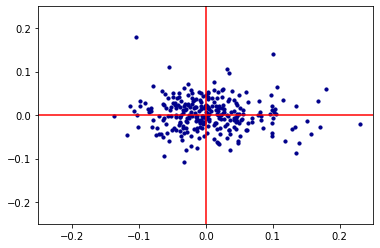

In [7]:
x = final_result.FGP-final_result.FGP.median()
y = final_result.DSP-final_result.DSP.median()
plt.scatter(x, y, c='DarkBlue', s=10)
plt.axhline(y=0, color = 'r')
plt.axvline(x=0, color = 'r')
plt.xlim(-0.25, 0.25)
plt.ylim(-0.25, 0.25)
plt.show()

As shown in the above scatter plot, all the points are divided into four quadrants. `The points in the first quadrant` represents the players who have the more effective performance on both offensive and defensive end. `The points in the third quadrant` represents the players who have the less effective performance on both offensive and defensive end. `The points in the second quadrant` represents the players who have the less effective performance on offensive end but the more effective performance on defensive end. `The points in the fourth quadrant` represents the players who have the less effective performance on defensive end but the more effective performance on offensive end.

In [8]:
new_table = pd.concat([x, y], axis=1)
new_table['Rating'] = new_table['FGP']+new_table['DSP']
new_table = new_table[new_table['FGP'] > 0] 
new_table = new_table[new_table['DSP'] > 0]  
new_table.sort_values(['Rating'], ascending=[False]).head(10)

,FGP,DSP,Rating
NAME,,,
andre miller,0.099899,0.139474,0.239373
rudy gobert,0.179390,0.058975,0.238365
james johnson,0.168069,0.032088,0.200157
andrew bogut,0.106223,0.063622,0.169845
john henson,0.134834,0.020844,0.155678
bismack biyombo,0.115325,0.033580,0.148905
anthony davis,0.097322,0.046030,0.143352
alonzo gee,0.032182,0.106480,0.138663
tony allen,0.034368,0.096267,0.130635


In the end of this part, the above dataframe describes the top ten players in the first quadrant with effective performance on both offensive and defensive end. It is not surprise that there are about eights players playing power forward or center on the court. The reason is that they are the guys who attack and protect the paint with their tall and strong body. With regard to the rest of two players playing guard, Andre Miller is known as an experienced player, while Tony Allen is known for his top denfensive ability and mentality.

### Part Two: Players’ field goal percentage in terms of shot distance and shot clock time
In this part, we will evaluate players’ performance in more depth by using players’ field goal percentage in terms of shot distance and shot clock time. In details, all the shots will be organized into 144 unique bins by `SHOT_DIST` and `SHOT_CLOCK` column. Shot distances will be segmented into 6 distance ranges: <5 ft, 5–10 ft, 10–15 ft, 15–20 ft, 20–25 ft, and 25–30 ft. Shot clock times will be segmented into 24 bins of 1 second each, from 0 to 24 seconds. Each bin will then be mapped to the field goal percentage of the shots taken in that bin. We begin by doing the following steps.

1. Removing the missing values from the `SHOT_CLOCK` column by using the [`dropna`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html)
2. Defining a fuction named `shots_in_range` to get index of rows in the given dataframe where the values in the `SHOT_DIST` column are within the certain distance range
3. Defining a fuction named `clock_in_range` to create a dataframe with field goal percentage corresponding to the shock clock time and shot distance
4. Defining a fuction named `FG_distance_clock` to integrate above two functions and ouput the final result of the given player
5. Creating a 2D heatmap of the final result with adjusted colormap by using [`sns.heatmap`](http://seaborn.pydata.org/generated/seaborn.heatmap.html)

In [9]:
data.dropna(subset=['SHOT_CLOCK'], inplace=True)
data = data.reset_index(drop = True)

In [10]:
def shots_in_range(shot_range, df, str):
    
    these_shots = []
    all_shot_idxs = range(df.shape[0])    
    for idx in all_shot_idxs:        
        this_shot_dist = df.loc[idx, str]
        if this_shot_dist >= shot_range[0] and this_shot_dist < shot_range[1]:
            these_shots.append(idx)
            
    return these_shots

def clock_in_range(ran, df, shots_idx):
    
    data_final = pd.DataFrame()    
    for idx in shots_idx:
        this_shot_clock = df.loc[idx, 'SHOT_CLOCK']                
        for r in shot_clock_ranges:           
            if this_shot_clock >= r[0] and this_shot_clock < r[1]:
                val = df.loc[idx, 'SHOT_RESULT']
                total_shots = 1
            else:
                val = 0
                total_shots = 0
            key = (ran[0], r[0])
            value = [val, total_shots]            
            if key not in dictionary:
                dictionary[key] = value
            else:
                dictionary[key][0] = dictionary[key][0] + val
                dictionary[key][1] = dictionary[key][1] + total_shots
            
    left = pd.Series(dictionary).reset_index()   
    left.columns = ['Shot Distance (ft)', 'Shot Clock (s)', 'Col3'] 
    del left['Col3']
    right = pd.DataFrame.from_dict(dictionary, orient='index',columns=['shot_made', 'total_shots']).reset_index()
    del right['index']
    d = pd.concat([left, right], axis=1)
    d['shots_percent'] = d['shot_made']/d['total_shots']
    
    return d

In [11]:
shot_dist_ranges = []
shot_clock_ranges = []
dictionary = {}
def FG_distance_clock(player_name):
    player = data.loc[data['player_name'] == player_name]
    new = player[['SHOT_DIST', 'SHOT_CLOCK', 'SHOT_RESULT']].copy()
    new.reset_index(inplace=True)
  
    for i in range(0, 6):
        shot_dist_ranges.append((5*i, 5*i+5))
    for i in range(0, 24):
        shot_clock_ranges.append((i, i+1))    
    for s in shot_dist_ranges:
        shots_idx = shots_in_range(s, new, 'SHOT_DIST')
        d = clock_in_range(s, new, shots_idx)

    return d.fillna(0)    

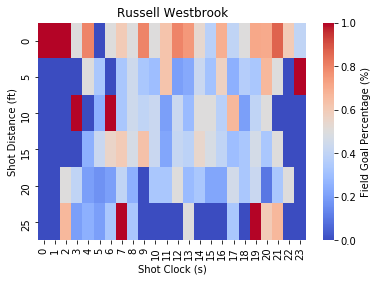

In [12]:
res = FG_distance_clock('russell westbrook').pivot(index='Shot Distance (ft)', columns='Shot Clock (s)', values='shots_percent')
ax = sns.heatmap(res, annot=False, cmap='coolwarm', cbar_kws={'label': 'Field Goal Percentage (%)'})
plt.title('russell westbrook'.title(), fontsize = 12)
plt.show()

Russell Westbrook was the point leaders in the 2014-2015 NBA season, with 28.1 points per game. Therefore, we are interested in how was his performance on the court according to shot distance and shot clock time.

As shown in the above heatmap, the upper part of the heatmap indicates that Russell Westbrook had higher field goal percentage around the basket. However, the two sides of the heatmap shows that Russell Westbrook had pretty poor field goal percentage in the start and the end of the shot clock. Intuitively, the field goal percentage might be mainly pulled down by the rush shots.

### Part Three: The exploration of hot hand phenomenon
In the last part, we will explore whether [hot hand phenomenon](https://en.wikipedia.org/wiki/Hot_hand) exists or not. Specifically, hot hand phenomenon means that a shooter is allegedly more likely to score if their previous attempts were successful. Therefore, we will respectively calculate the player's field goal percentage after one shot made, two shots made, three shots made, four shots made, and five shots made. After that, we will compare these field goal percentage to the player's general field goal percentage. We begin by doing the following steps.

1. Reloading the data to create Pandas Dataframes by using the [`read_csv`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html), and mapping (`made`, `missed`) to (1,0) in the `SHOT_RESULT` column  
2. Creating a dictionary which the keys are players' names and the values are the dataframes composed of `GAME_ID`, `player_name`, and `SHOT_RESULT`
3. Defining a fuction named `hot_hand_percentage` to calculate the field goal percentage after one shot made, two shots made, three shots made, four shots made, five shots made, and the general field goal percentage
5. Creating a bar plot of these field goal percentage by using [`matplotlib.pyplot.bar¶`](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.bar.html)

In [13]:
data = pd.read_csv("shot_logs.csv",header=0)
data['SHOT_RESULT'] = data['SHOT_RESULT'].map({'made': 1, 'missed': 0})

In [14]:
Player = data.player_name.unique()
PlayerData = {player_name : pd.DataFrame for player_name in Player}
for key in PlayerData.keys():
    PlayerData[key] = data[['GAME_ID', 'player_name', 'SHOT_RESULT']][data.player_name == key]

In [15]:
def hot_hand_percentage(player_name):
    FGM = data.groupby(['player_name']).sum().SHOT_RESULT
    FGA = data.groupby(['player_name']).count().SHOT_RESULT
    FGP = FGM.div(FGA)
    
    game_id = PlayerData[player_name].GAME_ID.unique()
    total = 0; made = 0; total2 = 0; made2 = 0; total3 = 0; made3 = 0
    total4 = 0; made4 = 0; total5 = 0; made5 = 0
    for key in game_id:
        A = PlayerData[player_name].groupby(['GAME_ID']).get_group(key)
        shot_seq = []
        for index, row in A.iterrows():
            shot_seq.append(row['SHOT_RESULT'])
        
        for i in range(len(shot_seq)):
            if i+1 < len(shot_seq): # Afte 1 shot made
                if shot_seq[i] == 1:
                    total = total+1
                    if shot_seq[i+1] == 1:
                        made = made+1
            if i+1 < len(shot_seq) and i+2 < len(shot_seq): # Afte 2 shots made
                if shot_seq[i] == 1 and shot_seq[i+1] == 1:
                    total2 = total2+1
                    if shot_seq[i+2] == 1:
                        made2 = made2+1
            if i+1 < len(shot_seq) and i+2 < len(shot_seq) and i+3 < len(shot_seq): # Afte 3 shots made
                if shot_seq[i] == 1 and shot_seq[i+1] == 1 and shot_seq[i+2] == 1:
                    total3 = total3+1
                    if shot_seq[i+3] == 1:
                        made3 = made3+1            
            if i+1 < len(shot_seq) and i+2 < len(shot_seq) and i+3 < len(shot_seq) and i+4 < len(shot_seq): # Afte 4 shots made
                if shot_seq[i] == 1 and shot_seq[i+1] == 1 and shot_seq[i+2] == 1 and shot_seq[i+3] == 1:
                    total4 = total4+1
                    if shot_seq[i+4] == 1:
                        made4 = made4+1                        
            if i+1 < len(shot_seq) and i+2 < len(shot_seq) and i+3 < len(shot_seq) and i+4 < len(shot_seq) and i+5 < len(shot_seq): #  Afte 5 shots made
                if shot_seq[i] == 1 and shot_seq[i+1] == 1 and shot_seq[i+2] == 1 and shot_seq[i+3] == 1 and shot_seq[i+4] == 1:
                    total5 = total5+1
                    if shot_seq[i+5] == 1:
                        made5 = made5+1
    return [FGP[player_name], made/total, made2/total2, made3/total3, made4/total4, made5/total5]


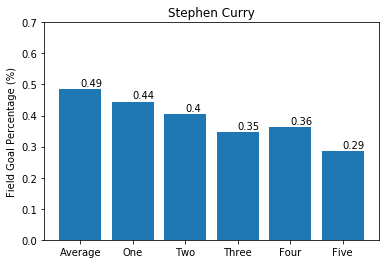

In [16]:
x = ['Average','One','Two','Three','Four','Five']
plt.bar(x, hot_hand_percentage('stephen curry'))
plt.ylabel('Field Goal Percentage (%)')
plt.ylim(0, 0.7)
plt.title('stephen curry'.title(), fontsize = 12)
for i, v in enumerate(hot_hand_percentage('stephen curry')):
    plt.text(x[i], v + 0.01, round(v,2))   
plt.show()

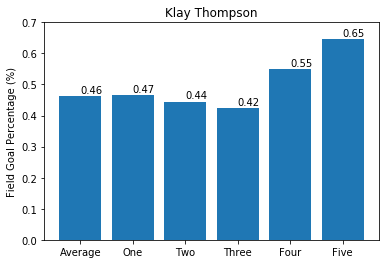

In [17]:
x = ['Average','One','Two','Three','Four','Five']
plt.bar(x, hot_hand_percentage('klay thompson'))
plt.ylabel('Field Goal Percentage (%)')
plt.ylim(0, 0.7)
plt.title('klay thompson'.title(), fontsize = 12)
for i, v in enumerate(hot_hand_percentage('klay thompson')):
    plt.text(x[i], v + 0.01, round(v,2))   
plt.show()

The [Splash Brothers](https://en.wikipedia.org/wiki/Splash_Brothers) are a duo of NBA basketball players consisting of Stephen Curry and Klay Thompson. They both play professionally for the Golden State Warriors. In 2014-2105 season, they became the first teammates in the league to be the starting guards in the same All-Star Game since 1975, and helped the Warriors win the 2014-2015 NBA Finals for the team's first title in 40 years. 

They are both known for their top shooting ability and their crazy hot hand. Therefore, we are really interested in whether hot hand phenomenon happens on this two top NBA players or not. As shown in the first bar plot, hot hand phenomenon seems not happens on Stephen Curry. The field goal percentage decreases as more shots are made previously. However, Klay Thompson seems really hot after four and five shots made. 